<a href="https://colab.research.google.com/github/lamechah/Perceptron_Model/blob/main/Perceptron_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import and pre-process linearly separable data




In [ ]:
## Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Get dataset from sharable link
! wget "https://docs.google.com/spreadsheets/d/1rsrAUSWobgIb9Mu0ZN60XOQvOpUHI6_VI-B-PiV1vqw/export?format=csv"

--2020-10-11 03:26:53--  https://docs.google.com/spreadsheets/d/1rsrAUSWobgIb9Mu0ZN60XOQvOpUHI6_VI-B-PiV1vqw/export?format=csv
Resolving docs.google.com (docs.google.com)... 173.194.217.101, 173.194.217.102, 173.194.217.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-14-18-sheets.googleusercontent.com/export/l5l039s6ni5uumqbsj9o11lmdc/3iqgj35buadr1g1ljjrskoutrg/1602386810000/100689098553185002241/*/1rsrAUSWobgIb9Mu0ZN60XOQvOpUHI6_VI-B-PiV1vqw?format=csv [following]
--2020-10-11 03:26:53--  https://doc-14-18-sheets.googleusercontent.com/export/l5l039s6ni5uumqbsj9o11lmdc/3iqgj35buadr1g1ljjrskoutrg/1602386810000/100689098553185002241/*/1rsrAUSWobgIb9Mu0ZN60XOQvOpUHI6_VI-B-PiV1vqw?format=csv
Resolving doc-14-18-sheets.googleusercontent.com (doc-14-18-sheets.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-14-18-sheets.googleuser

In [ ]:
## Read the csv to a Dataframe
df = pd.read_csv("export?format=csv")
## Explore Data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   int64  
 1   1       2000 non-null   float64
 2   2       2000 non-null   float64
 3   3       2000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.6 KB


In [ ]:
## Re-label classes as -1 OR +1
## Replace all 0s for -1 in the y column
df['3'] = df['3'].replace(0,-1)
print("Classes have changed to:")
print(df['3'].unique())

Classes have changed to:
[-1  1]


Review if data is linearly separable

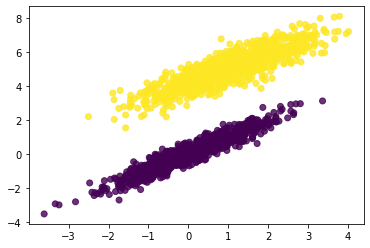

In [ ]:
##We Plot the values to see if they are linearly separable 
plt.scatter(df.values[:,1], df.values[:,2], c = df['3'], alpha=0.8)

In [ ]:
## Convert dataframe to  numpy.ndarray 
ndarray = df.values  
## Print new data type
print(type(ndarray))            

<class 'numpy.ndarray'>


In [ ]:
## Choose a random seed and shuffle the data randomly
np.random.seed(5)
np.random.shuffle(ndarray)

In [ ]:
## Split data into train 70% and test 30%
train = ndarray[0:int(0.7*len(ndarray))]
test = ndarray[int(0.7*len(ndarray)):int(len(ndarray))]

In [ ]:
## Select data attributes as x and target/class column as y for train and test. 
x_train = train[:, 1:3]
y_train = train[:, 3]

x_test = test[:, 1:3]
y_test = test[:, 3]

##Step 2: Create Perceptron class 

In [ ]:
## Create a class to wrap up the function and parameters
class MyBeautifulPerceptron:
    ##constructor of the class
    def __init__(self):
        ##define w 
        ##apply some random Ws to start
        # w is a 2D-vector 
        self.w = np.array([0.1,-0.5])
        ## create some bias - the constant
        ## We could have either created the constant here, or add a constant of 1 to the dataset
        self.b = 1.0

    ##Perceptron function
    def predict(self, x_train):
        # x is a n x2 Array that represent the data
        #Next, we multiply the weights by the inputs, and then sum them up. Another name for this is the “dot product.”    
        #We also add bias here
        f = (self.w * x_train).sum(axis=1) + self.b ##This is the same as doing ##f = np.dot(w, x)
        pred = np.sign(f)
        return pred 

    ##Function to fit the 
    def fit(self, x_train, y_train, x_test, y_test):
        ##Here's how to deal with infinite loop 
        ##We introduce the number of the first iteration
        iterations = 0

            ##Create a loop that runs while True
        while True:
            ##Predictions
            pred = self.predict(x_train)
            print("Predicting...")
            ##Save each hypothesis and calculate which hypothesis is better than the other ##So we have to compare y_train againts the prediction
            is_pred_correct = y_train == pred ##Returns true or false
            ##Calculate that in a number ##False is zero
            train_acc = np.count_nonzero(is_pred_correct)/ (y_train).size
            ##Get all the wrong predicton (False values)
            is_pred_wrong = np.logical_not (is_pred_correct)
            error_indexes = np.nonzero(is_pred_wrong)[0]
            print("--------")
            print(f'Training Accuracy {train_acc}')
            ##Calculate validation accuracy
            pred_valid = self.predict(x_test)
            valid_acc = np.count_nonzero (pred_valid == y_test) / len(y_test)
            print("--------")
            print(f'Validation Accuracy {valid_acc}')
            ## Catch error if the training is 100% - stop updating ws when there are no errors
            if len(error_indexes) > 0:
                ##Find where these errors are in the x_train
                next_i = error_indexes[0]
                ##Update the weights
                #Now that we’ve made our prediction, we’re ready to update the weights. 
                w_new = x_train[next_i] * y_train[next_i]
                self.w +=w_new
                self.b += y_train[next_i]
                print("--------")
                print("New weights to be calculated")
                print("--------")
                #print(self.w)
            else:
                print("********************************")
                print ("Maximum accuracy obtained")
                print("********************************")

                break ##This stops the loop for continuing once the validation gets to 100%

##Step 3: Fit model to data

In [ ]:
## Initialise an object of the class
perceptron = MyBeautifulPerceptron()
## Fit perceptron
perceptron.fit(x_train, y_train, x_test, y_test)

Predicting...
--------
Training Accuracy 0.005714285714285714
--------
Validation Accuracy 0.005
--------
New weights to be calculated
--------
Predicting...
--------
Training Accuracy 0.22642857142857142
--------
Validation Accuracy 0.265
--------
New weights to be calculated
--------
Predicting...
--------
Training Accuracy 0.7021428571428572
--------
Validation Accuracy 0.6633333333333333
--------
New weights to be calculated
--------
Predicting...
--------
Training Accuracy 0.7435714285714285
--------
Validation Accuracy 0.7466666666666667
--------
New weights to be calculated
--------
Predicting...
--------
Training Accuracy 0.9735714285714285
--------
Validation Accuracy 0.9666666666666667
--------
New weights to be calculated
--------
Predicting...
--------
Training Accuracy 1.0
--------
Validation Accuracy 0.9983333333333333
********************************
Maximum accuracy obtained
********************************


##Step 4: Analyse results

Taking a look at the errors we can see that the error went to 0 around the 6th iteration. For the remainder of the iterations it remained at 0.
When the error goes to 0 and stays there, we know that our model has converged. This tells us that our model has correctly “learned” the appropriate weights.

In [ ]:
## Call the predict method for the test data 
pred_test = perceptron.predict(x_test)
test_acc = np.count_nonzero (pred_test == y_test) / len(y_test)
print (f"Test accuracy: {test_acc}")

Test accuracy: 0.9983333333333333


##Step 5: Compare againts off-the-shelf implementation

In [ ]:
## Import off-the-shelf model

from sklearn.linear_model import Perceptron

skpercep = Perceptron()

In [ ]:
## Fit model to data 

skpercep.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
## Predict model

skpred = skpercep.predict(x_test)

sktest_acc = np.count_nonzero (skpred == y_test) / len(y_test)
print (f"Test accuracy according to Sklearn's models: {sktest_acc}")

Test accuracy according to Sklearn's models: 0.9983333333333333


## Step 6: Try a non-linearly separable dataset

Load dataset which is non-linearbly separable

In [ ]:
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt

##Load data and convert it to DataFrame 
def load_data(): 
    cancer = load_breast_cancer()     
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    df = pd.DataFrame(data, columns=columns)

    return df

In [ ]:
df_nonl = load_data()
# Impl-Note: more convenient to use +/-1, rather than 0/1 to represent the 
# class labels
df_nonl['target'] = df_nonl['target'].replace(0,-1)

print(df_nonl['target'].unique())

# -- this is a common way to replace values in a numpy array

[-1.  1.]


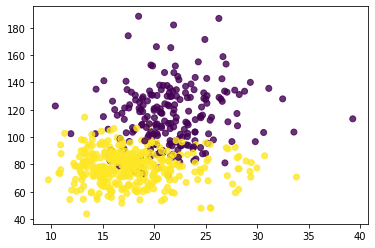

In [ ]:
plt.scatter(df_nonl.values[:,1], df_nonl.values[:,2], c = df_nonl['target'], alpha=0.8)

In [ ]:
## Split data 70% - 30%

train_nonl = df_nonl[0:int(0.7*len(df_nonl))]
test_nonl = df_nonl[int(0.7*len(df_nonl)):int(len(df_nonl))]


x_train_nonl = train_nonl.iloc[:, 1:3].values
y_train_nonl = train_nonl.iloc[:, 30].values

x_test_nonl = test_nonl.iloc[:, 1:3].values
y_test_nonl = test_nonl.iloc[:, 30].values

In [ ]:
import matplotlib.pyplot as plt
def viz_hypo(score_func, pred_func, X_samples, y_samples):
    """
    X_samples is to provide a range
    """
    # visualisation of the model behaviour
    x0_min, x1_min = np.min(X_samples, axis=0)
    x0_max, x1_max = np.max(X_samples, axis=0)

    xx, yy = np.meshgrid(np.arange(x0_min - 0.1, x0_max + 0.1, 0.02),
                        np.arange(x1_min - 0.1, x1_max + 0.1, 0.02))
    
    grid_coord = np.stack((xx.flatten(), yy.flatten())).T
    zz_c = pred_func(grid_coord).reshape(xx.shape)
    zz_v = score_func(grid_coord).reshape(xx.shape)

    fig1, ax1 = plt.subplots(constrained_layout=True)
    C = ax1.contourf(xx, yy, zz_v) 
    C2 = ax1.contour(xx, yy, zz_v, colors=('k', ), linewidths=2)
    ax1.clabel(C2, inline=True, fontsize=10)

    fig2, ax2 = plt.subplots(constrained_layout=True)
    C = ax2.contourf(xx, yy, zz_c) 
    C2 = ax2.contour(xx, yy, zz_c, colors=('k', ), linewidths=2)
    ax2.clabel(C2, inline=True, fontsize=10)

    # Draw the training samples
    ax1.scatter(X_samples[:, 0], X_samples[:, 1], c=y_samples, linewidth=1, edgecolor='k')
    ax2.scatter(X_samples[:, 0], X_samples[:, 1], c=y_samples, linewidth=1, edgecolor='k')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: No contour levels were found within the data range.


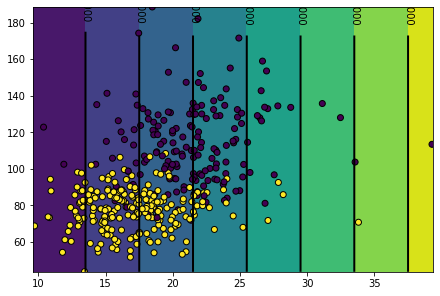

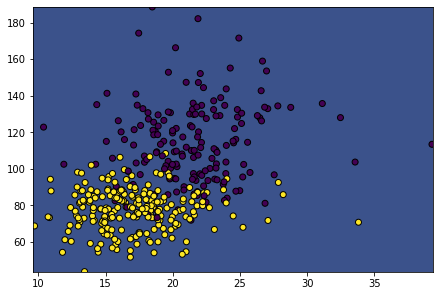

In [ ]:
# just throw in a random classifier to test visualisation
tmp_p = lambda x_train_nonl: x_train_nonl[:, 0] - 5.5
viz_hypo(tmp_p, lambda x_train_nonl:tmp_p(x_train_nonl) > 0, x_train_nonl, y_train_nonl)

## Step 7 : Solve infinite loop by adding max iteration condition

Infinite loop question 
The algorithm ends when the 100% train accuracy is achieved. If i cannot use a strainght line to separate samples then this algorithm will end up in a infinit loop - like what happened to when I tried to run this notebook: https://colab.research.google.com/drive/1goAjQxFNS_KbkPByuEqsVLC2zWr5agEJ?usp=sharing

What could be the solution for that problem? In this example I dealt with it by adding a maximun number of iterations to the loop. This avoids follwing into the infinite loop

In [ ]:
## Create an enviromental constant to limit iterations 
MAX_ITERATIONS = 100

## Create a class to wrap up the function and parameters
class NonLinearPerceptron:
    ##constructor of the class
    def __init__(self):
        ##define w 
        ##apply some random Ws to start
        # w is a 2-vector 
        self.w = np.array([0.1,-0.5])
        ## create some bias - the constant
        ## We could have either created the constant here, or add a constant of 1 to the dataset
        self.b = 1.0

    ##Perceptron function
    def predict(self, x_train):
        # x is a n x2 Array that represent the data
        #Next, we multiply the weights by the inputs, and then sum them up. Another name for this is the “dot product.”    
        #We also add bias here
        f = (self.w * x_train).sum(axis=1) + self.b ##This is the same as doing ##f = np.dot(w, x)
        pred = np.sign(f)
        return pred 

    ##Function to fit the 
    def fit(self, x_train, y_train, x_test, y_test):
        ##Here's how to deal with infinite loop 
        ##We introduce the number of the first iteration
        iterations = 0

            ##Create a loop that runs while True
        while True:
            ##Predictions
            pred = self.predict(x_train)
            print("Predicting...")
            ##Save each hypothesis and calculate which hypothesis is better than the other ##So we have to compare y_train againts the prediction
            is_pred_correct = y_train == pred ##Returns true or false
            ##Calculate that in a number ##False is zero
            train_acc = np.count_nonzero(is_pred_correct)/ (y_train).size
            ##Get all the wrong predicton (False values)
            is_pred_wrong = np.logical_not (is_pred_correct)
            error_indexes = np.nonzero(is_pred_wrong)[0]
            print("--------")
            print(f'Training Accuracy {train_acc}')
            ##Calculate validation accuracy
            pred_valid = self.predict(x_test)
            valid_acc = np.count_nonzero (pred_valid == y_test) / len(y_test)
            print("--------")
            print(f'Validation Accuracy {valid_acc}')
            ## Catch error if the training is 100% - stop updating ws when there are no errors
            if len(error_indexes) > 0:
                ##Find where these errors are in the x_train
                next_i = error_indexes[0]
                ##Update the weights
                #Now that we’ve made our prediction, we’re ready to update the weights. 
                w_new = x_train[next_i] * y_train[next_i]
                self.w +=w_new
                self.b += y_train[next_i]
                print("--------")
                print("New weights to be calculated")
                print("--------")
                #print(self.w)
            else:
                print("********************************")
                print ("Maximum accuracy obtained")
                print("********************************")

                break ##This stops the loop for continuing once the validation gets to 100%

            ##For every iteration we increase the number of iterations by one
            iterations += 1
            print(f"Iteration number: {iterations}")
            print("********************************")
            
            ##We add the condition to stop after 100 iters
            if iterations >= MAX_ITERATIONS: 
                print ('Iterations exceeded!')
                break 


## Step 8: Fit new model

In [ ]:
## Initialise an object of the class
perceptron_nonl = NonLinearPerceptron()
## Fit perceptron
perceptron_nonl.fit(x_train_nonl, y_train_nonl, x_test_nonl, y_test_nonl)

Predicting...
--------
Training Accuracy 0.43467336683417085
--------
Validation Accuracy 0.22807017543859648
--------
New weights to be calculated
--------
Iteration number: 1
********************************
Predicting...
--------
Training Accuracy 0.5653266331658291
--------
Validation Accuracy 0.7719298245614035
--------
New weights to be calculated
--------
Iteration number: 2
********************************
Predicting...
--------
Training Accuracy 0.43467336683417085
--------
Validation Accuracy 0.22807017543859648
--------
New weights to be calculated
--------
Iteration number: 3
********************************
Predicting...
--------
Training Accuracy 0.5653266331658291
--------
Validation Accuracy 0.7719298245614035
--------
New weights to be calculated
--------
Iteration number: 4
********************************
Predicting...
--------
Training Accuracy 0.43467336683417085
--------
Validation Accuracy 0.22807017543859648
--------
New weights to be calculated
--------
Iterati

## Step 9: Analise results

In [ ]:
## Call the predict method for the test data 
pred_test_nonl = perceptron_nonl.predict(x_test_nonl)
test_acc_nonl = np.count_nonzero (pred_test_nonl == y_test_nonl) / len(y_test_nonl)
print (f"Test accuracy: {test_acc_nonl}")

Test accuracy: 0.7602339181286549


## Step 10: Compare againts off-the-shelf

In [ ]:
from sklearn.linear_model import Perceptron

skpercep = Perceptron()

In [ ]:
skpercep.fit(x_train_nonl, y_train_nonl)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
skpred_nonl = skpercep.predict(x_test_nonl)

sktest_acc_nonl = np.count_nonzero (skpred_nonl == y_test_nonl) / len(y_test_nonl)
print (f"Test accuracy according to Sklearn's models: {sktest_acc_nonl}")

Test accuracy according to Sklearn's models: 0.7309941520467836
